In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
data = \
pd.read_csv('../COMSOL_results/Conductance_(h=400nm,omega=0).csv',
            sep=',',
            comment="%",
            names=['l','w','hydro','fourier'])

ls = [0]+list(np.unique(data.l))
width = data.w[data.l==ls[-1]]
fourier = data.fourier[data.l==ls[-1]]
conductances = np.array([fourier]+[data.hydro[data.l==l] for l in ls if l!=0])

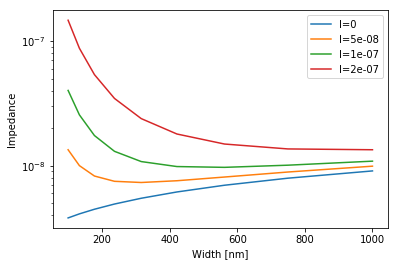

In [59]:
for cond, l in zip(conductances, ls):
    plt.semilogy(width*1E9,1/cond,label='l={}'.format(l))
plt.legend()
plt.xlabel('Width [nm]')
plt.ylabel('Impedance')


The following plot shows that the interpolation $I = I_0$

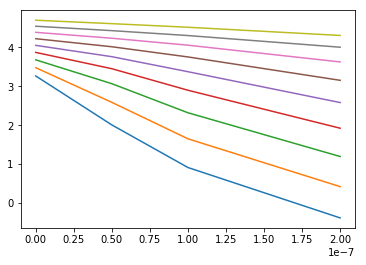

In [53]:
for r,w in zip(conductances.transpose(),width):
    plt.plot(ls,np.log(r*w))

In [29]:
len(w)

0